# Case Study On Urban Population Dynamics

Many of your Urban Informatics projects will deal with have urban population. Let's take a closer look on how it can be defined and how is it distributed in space. 

Specifically lets focus on the following question:

### Is the residential population distribution representative for urban dynamics in bulk? 
### Specifically is the daytime working population distribution substantially different?

Along the way recall working with Pandas dataframes and learn a way to visualize spatial distributions in Python using shapefiles.

In [1]:
#import useful packages
import pandas as pd #Pandas for dataframes
import numpy as np #Numpy for numeric arrays and vector maths
import math #for mathematical operations like logarithm
#import statsmodels.formula.api as smf
import matplotlib.pylab as plt
#make sure python plots are embedded in the notebook
%matplotlib inline 

In [2]:
#upload a dataframe for residential location and demographic decomposition of urban population acording to LEHD
LEHDR=pd.read_csv("SMdata/LEHD-resident.csv",index_col=0)

In [3]:
#upload a dataframe for work location and demographic decomposition of urban population acording to LEHD
LEHDW=pd.read_csv("SMdata/LEHD-work.csv",index_col=0)

In [4]:
#take a glimpse in the data
LEHDR.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
2,198,108,90,67,70,61,104,45,29,8,12,24,31,38,38
3,11398,5393,6005,2551,6346,2501,5990,4106,973,120,209,1414,2035,2666,2732
4,12318,6125,6193,3731,6421,2166,8259,2063,1591,122,283,1375,1859,2392,2961
5,10751,5546,5205,2154,6057,2540,9513,464,656,36,82,792,1626,2466,3713
6,6729,3287,3442,1409,3692,1628,5093,677,818,53,88,582,1052,1538,2148


Data provides the total count as well as demographic decomposition of residential populaton per NYC taxi zone (not a 'native' unit for US Census, we use this aggregation for compatibility with further analysis of urban mobility data)

In [5]:
#Look at the data stats
LEHDR.describe()
#We have a total of 261 taxi zones with data, average of 13672.6 residents per zone, the smallest has only 40 residents and the largest - 48629 residents

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,13672.601533,6609.865900,7062.735632,3154.651341,7643.739464,2874.210728,8394.957854,3295.226054,1597.501916,128.325670,256.590038,1568.632184,2247.517241,2988.498084,3713.302682
std,9680.577392,4628.773452,5093.221366,2366.329312,5420.540564,2085.523846,6190.873828,4437.941903,1859.520212,111.811127,200.034008,1281.468218,1676.119109,2161.019226,2661.564273
min,40.000000,16.000000,24.000000,9.000000,16.000000,15.000000,26.000000,6.000000,5.000000,0.000000,1.000000,4.000000,6.000000,13.000000,8.000000
25%,7847.000000,3691.000000,3944.000000,1596.000000,4301.000000,1346.000000,3884.000000,566.000000,479.000000,47.000000,108.000000,601.000000,1121.000000,1620.000000,1877.000000
50%,12091.000000,5887.000000,6332.000000,2793.000000,6925.000000,2585.000000,7648.000000,1522.000000,1053.000000,102.000000,223.000000,1347.000000,1934.000000,2645.000000,3419.000000
75%,18811.000000,8920.000000,9788.000000,4229.000000,10608.000000,3909.000000,11525.000000,4184.000000,1895.000000,179.000000,349.000000,2246.000000,2979.000000,4141.000000,5069.000000
max,48629.000000,21874.000000,26755.000000,13105.000000,26650.000000,11111.000000,32818.000000,24998.000000,11989.000000,730.000000,1163.000000,6105.000000,8819.000000,11312.000000,15810.000000


In [6]:
#take a glimpse in the population distribution by work location
LEHDW.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
3,4989,1863,3126,892,2774,1323,2513,1968,386,39,83,637,941,1287,1232
4,2717,1310,1407,688,1506,523,1884,512,251,24,46,350,434,599,646
5,1191,658,533,319,631,241,960,139,87,0,5,96,181,257,338
6,2495,1070,1425,491,1315,689,1907,330,206,20,32,167,453,540,844
7,17223,8980,8243,4006,9611,3606,12137,2789,1910,143,244,2238,3083,3795,4101


In [7]:
#Look at the data stats
LEHDW.describe()
#overall impression - distribution is more narrow

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,16186.665370,8067.136187,8119.529183,3530.342412,9227.630350,3428.692607,10431.225681,3471.256809,1859.914397,136.482490,287.785992,1696.723735,2552.630350,3534.727626,4872.241245
std,25772.339555,13537.685598,12459.126010,5846.890848,15176.841009,4970.647290,17687.293821,4787.477917,3234.556316,205.964634,477.092747,2115.325209,3514.101766,5267.232367,9452.361730
min,5.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,4084.000000,1978.000000,2133.000000,847.000000,2339.000000,996.000000,2513.000000,970.000000,355.000000,33.000000,67.000000,511.000000,734.000000,993.000000,1050.000000
50%,8263.000000,3996.000000,4302.000000,1692.000000,4610.000000,1908.000000,5171.000000,2120.000000,763.000000,70.000000,137.000000,1010.000000,1468.000000,1978.000000,2052.000000
75%,16136.000000,7800.000000,8243.000000,3494.000000,8879.000000,3678.000000,10435.000000,3908.000000,1856.000000,142.000000,275.000000,1983.000000,2810.000000,3708.000000,4189.000000
max,197140.000000,107473.000000,91392.000000,44077.000000,117884.000000,39189.000000,142519.000000,44468.000000,25756.000000,1446.000000,3477.000000,14126.000000,25250.000000,41191.000000,79399.000000


In [8]:
#merge the two dataframes: perform inner merge on index
#as column names are largely repeated, introduce a suffix for the ones from the second dataframe
Pdata=LEHDR.merge(LEHDW, on=None, left_index=True, right_index=True, how='inner', suffixes=('','W'))
#also for the sake of consistency rename the total from LEHDR into totalR
Pdata.rename(columns={'total':'totalR'},inplace=True)

In [9]:
Pdata.head()

,totalR,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,...,age_55_overW,whiteW,blackW,asianW,othersW,two_or_moreW,less_high_schoolW,high_schoolW,collegeW,bachelorW
tz,,,,,,,,,,,,,,,,,,,,,
3,11398,5393,6005,2551,6346,2501,5990,4106,973,120,...,1323,2513,1968,386,39,83,637,941,1287,1232
4,12318,6125,6193,3731,6421,2166,8259,2063,1591,122,...,523,1884,512,251,24,46,350,434,599,646
5,10751,5546,5205,2154,6057,2540,9513,464,656,36,...,241,960,139,87,0,5,96,181,257,338
6,6729,3287,3442,1409,3692,1628,5093,677,818,53,...,689,1907,330,206,20,32,167,453,540,844
7,43048,21648,21400,11777,24286,6985,32818,3975,5114,334,...,3606,12137,2789,1910,143,244,2238,3083,3795,4101


Perhaps a first idea for exploratory analysis is to compare spatial distribution of residentail against working population

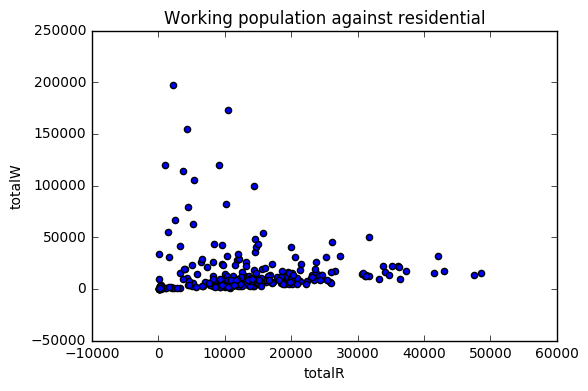

In [11]:
#an easiest way to do so is a scatter plot
#Pandas have plotting functionality embedded (leveraging Matplotlib)
Pdata.plot(x='totalR',y='totalW',kind='scatter',title='Working population against residential')

No obvious pattern. Let's also try log-scale visualization

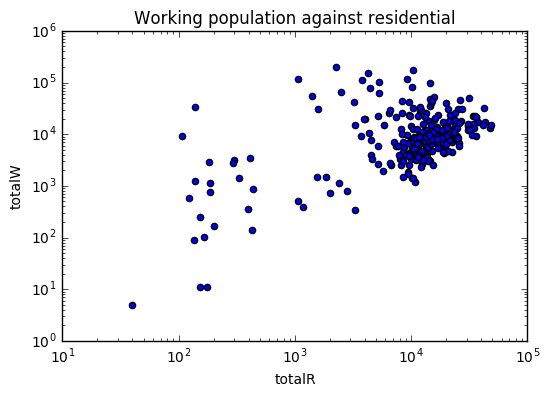

In [12]:
Pdata.plot(x='totalR',y='totalW',kind='scatter',title='Working population against residential',logx=True,logy=True)

Now, while we can see a clear nearly linear increasing bottom-line trend, it's hard to claim an overall correlation. Let's look at the correlation value

#### Correlation

Recall the concept of Pearson correlation coefficient. Given two random variables $X,Y$ with observations $X_1,X_2,...,X_n$, $Y_1,Y_2,...,Y_n$ it is defined as
$$
C=\frac{E[(X-E[X])(Y-E[Y])]}{\sigma(X)\sigma(Y)},
$$
where $E[X]=\sum_i X_i/n$ is the mean, $\sigma(X)=\sqrt{E[(X-E[X])^2]}=\sqrt{\frac{\sum_i(X_i-E[X])^2}{n}}$ is the standard deviation.

Correlaton gets higher when $X$ and $Y$ get above/below average together and gets lower when they appear in a couterphase. One can see that $-1\leq C\leq 1$, where $\pm 1$ is reached only is case of a strict linear dependence. Zero correlation is smth you would averagely expect at random.


In [23]:
#correlation matrix between every pair of columns of a given list (including correlations of column with itself with is always 1)
np.corrcoef(Pdata.totalR,Pdata.totalW)

array([[ 1.        , -0.04078555],
       [-0.04078555,  1.        ]])

The correlation turn out to be negative!!! So overall working population is distributed quite differently from residential.

Let's try to visualize it spatially

In [24]:
#just for comparison example here is correlation between male and female population
np.corrcoef(Pdata.male,Pdata.female)[0][1]

0.98243884599565034

In [14]:
#for this purpose we'll need shape file for the taxi zones
#include necessary modules
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
#read the shapefiles
tzs = shp.Reader('taxi_zones/taxi_zones.shp')
#separare data records and geometry of the taxi zones 
tzs_records=tzs.records()
tzs_shape=tzs.shapeRecords()

In [15]:
#look at what the data records look like
tzs.fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 9, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11],
 ['zone', 'C', 254, 0],
 ['LocationID', 'N', 4, 0],
 ['borough', 'C', 254, 0]]

In [16]:
tzs_records[0]

[1, '1.16357453189e-001', '7.82306788500e-004', 'Newark Airport', 1, 'EWR']

In [17]:
#sample of the shape
tzs_shape[0].shape.points

[[933100.9183527103, 192536.08569720192],
 [933091.0114800561, 192572.17526147654],
 [933088.5848363293, 192604.9701013019],
 [933121.5604029286, 192857.3815947791],
 [933149.268070866, 192978.64529974],
 [933222.303599316, 193293.27321561542],
 [933252.5816221443, 193450.60036714407],
 [933297.7228000937, 193555.43279791903],
 [933330.5712151835, 193748.8233831425],
 [933350.6320882778, 193794.68697530977],
 [933355.7056937596, 193834.0240346551],
 [933365.7979032588, 193886.46647872418],
 [933431.7392324115, 194391.29051182547],
 [933465.0379729305, 194801.09275264665],
 [933463.4338186719, 195227.36293221635],
 [933471.1052103372, 195315.8792411817],
 [933483.7536692393, 195397.82719968376],
 [933511.4361339996, 195509.2545406304],
 [933554.0907006934, 195620.65066105462],
 [933609.1944352826, 195718.9049942211],
 [933669.2474974946, 195797.47528837126],
 [933731.7750771455, 195866.2036557206],
 [933779.2756322531, 195908.73159505273],
 [933841.7617821106, 195957.78647365439],
 [933

In [18]:
#implement a function for heatmap visualization of attributes of taxi zones provided through a dataframe df
def plot_on_map(shp,df,column,areaNorm=False,logScale=False):
    #take shapefile as shp, dataframe as df, a column to visualize and two flags on whether to normalize by area and to take log scale
    
    #shortcuts for accessing records and points of the shapes
    shp_records=shp.records()
    shp_shape=shp.shapeRecords()
    
    x = {} #dictionary for values to visualize for each key - create it below
    
    for tz in df.index:
        key=tz
        x[key]=df[column][tz]

    y = {} #normalized version of the values now assigned to each shape already
    for s in range(0,len(shp_records)):
        z=int(shp_records[s][0])
        if z in x.keys(): 
            x_ = x[z]
            if areaNorm:
                x_ = x_ / float(shp_records[s][2])
            if logScale:
                x_ = math.log( x_+(x_==0))
            y[z] = x_    
                
    #min-max values            
    maxY=max(y.values())
    minY=min(y.values())
    
    if logScale: #if log-scale limit the scale to the values no lower than exp(-3)~0.04 of the max
        minY=maxY-3
    
    #prepare colormap
    cbins=20; #number of colorscale bins
    cmap = plt.cm.cool(np.linspace(0,1,cbins+1))
    #plot new figure
    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca()
    
    #visualize each shape with the color depending on the value 
    for s in range(0,len(shp_records)): #for all shapes
        z=int(shp_records[s][0]) #take the shape id
        if z in y.keys(): #if it has a corresponding value       
            k=int(cbins*(y[z]-minY)/(maxY-minY)) #pick up a color based on a value
            if k<0: #truncate negatives (can occur in log-scale due to sclae limitation)
                k=0
            c=cmap[k][0:3] #get the RGB color  
            #get x,y of the shape
            shape=shp_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            #plot a polygon of that shape
            poly=Polygon(zip(x_,y_))
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("heatmap") #add title

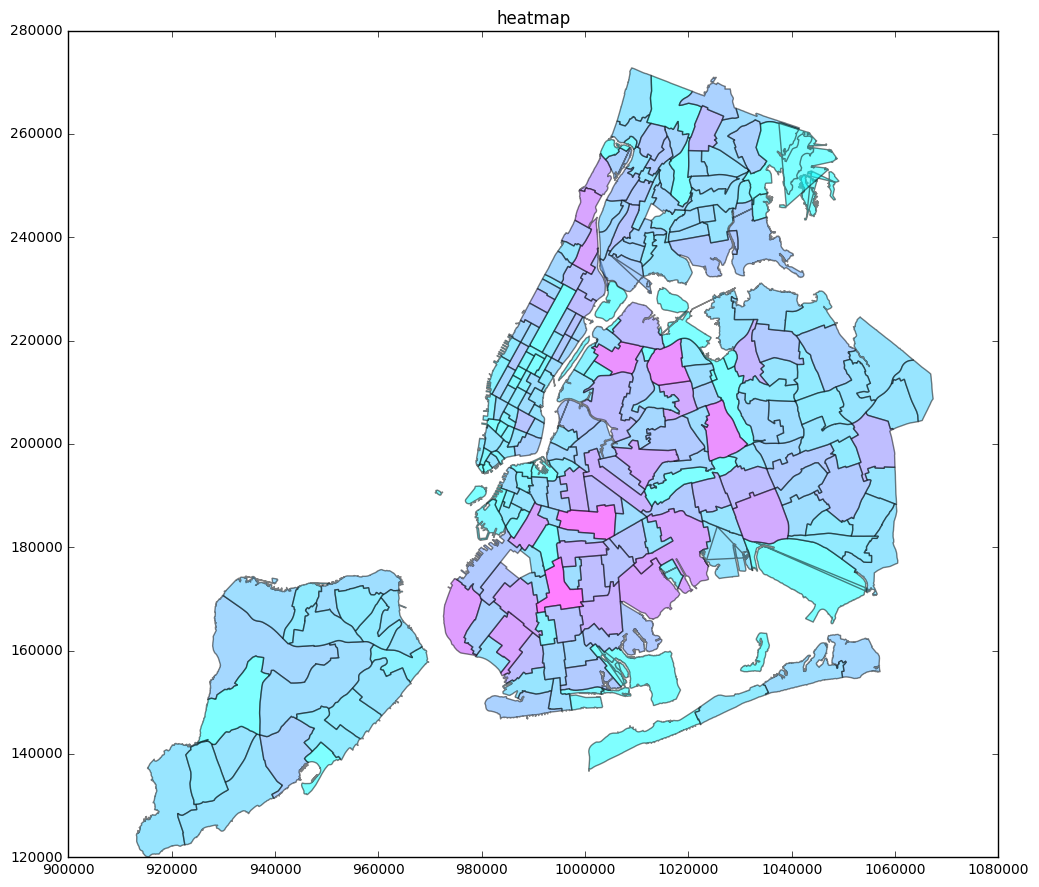

In [19]:
#plot residential population without any normalization
plot_on_map(tzs,Pdata,'totalR',areaNorm=False,logScale=False)

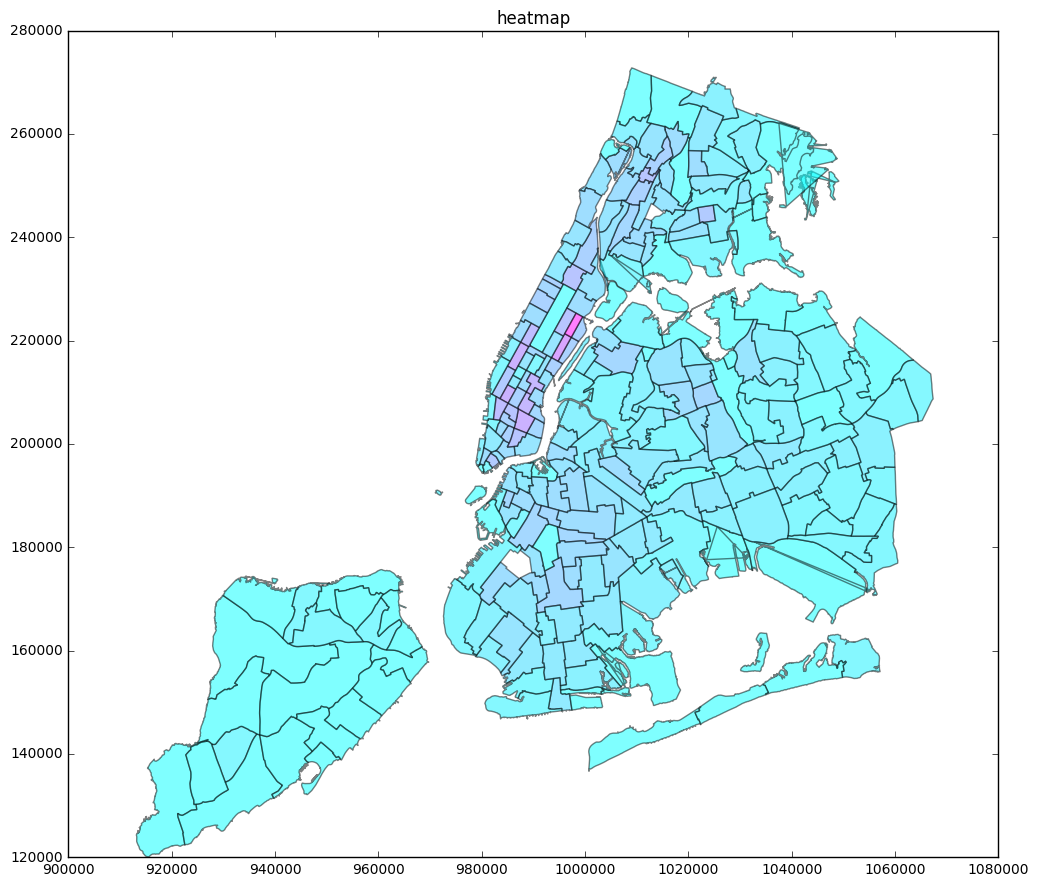

In [20]:
#plot residential population density
plot_on_map(tzs,Pdata,'totalR',areaNorm=True,logScale=False)

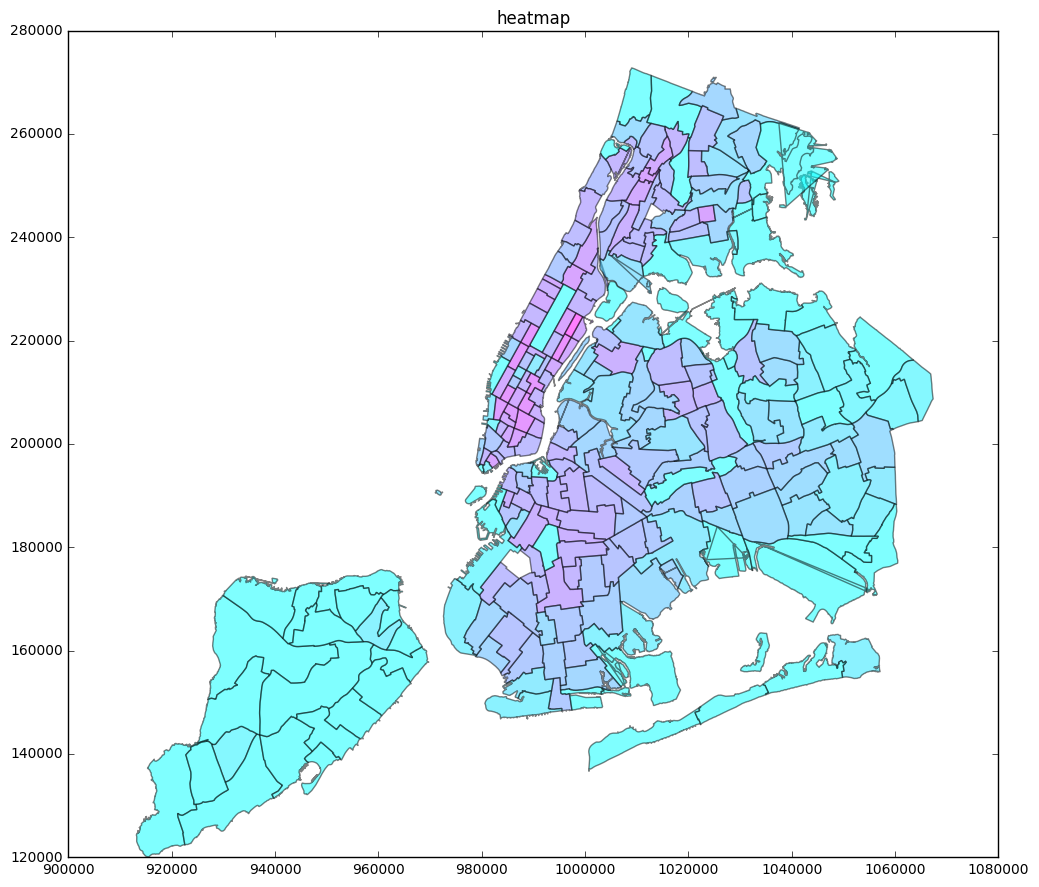

In [21]:
#same on the log-scale
plot_on_map(tzs,Pdata,'totalR',areaNorm=True,logScale=True)

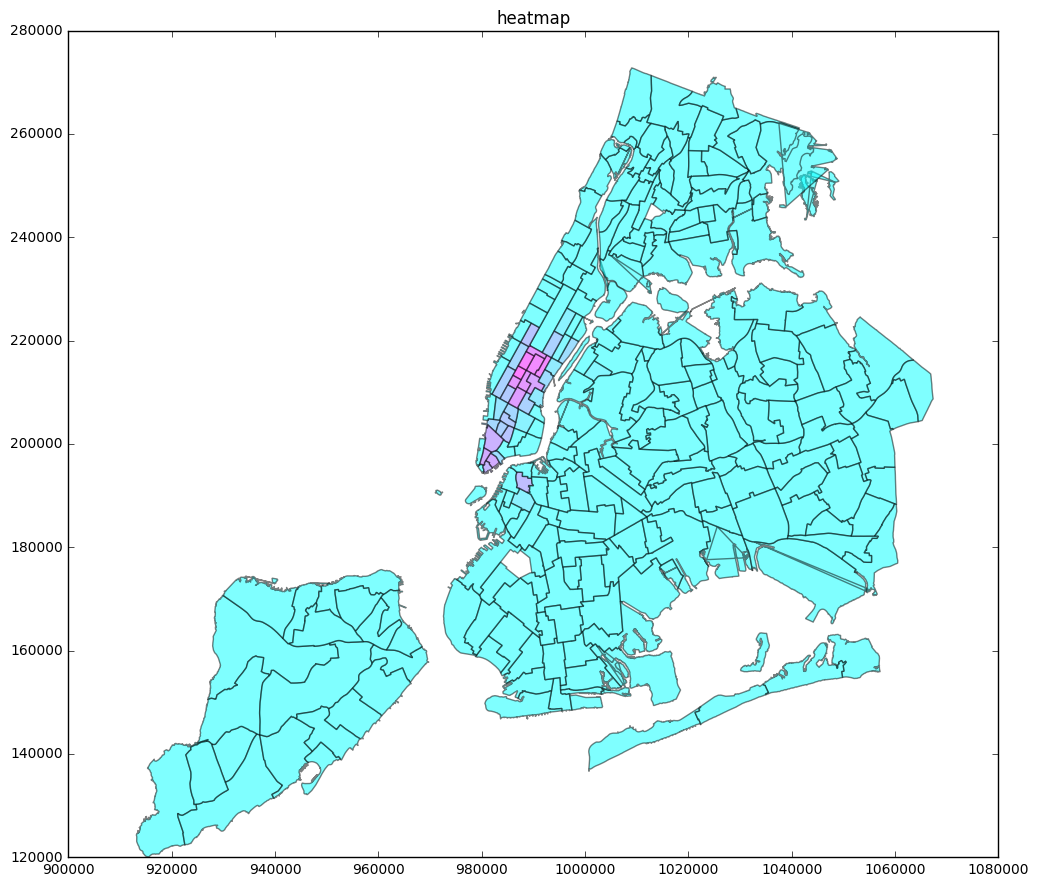

In [22]:
#now compare against working population
plot_on_map(tzs,Pdata,'totalW',areaNorm=True,logScale=True)